In [4]:
#import the dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


REadIng DaTa  from the csv file

In [5]:
data= pd.read_csv('/content/heart_disease_data.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Exploration in the targeted value

In [9]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

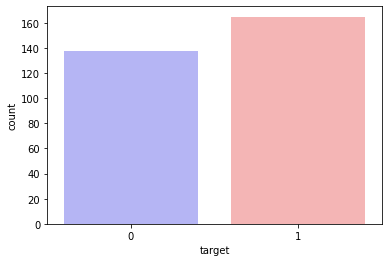

In [10]:
sns.countplot(x="target",data=data,palette="bwr")
plt.show()

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

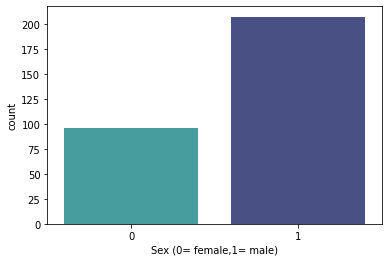

In [12]:
sns.countplot(x='sex',data=data,palette='mako_r')
plt.xlabel("Sex (0= female,1= male)")
plt.show()

In [13]:
count_no_disease= len(data[data.target==0])
count_have_disease = len(data[data.target==1])
print('Percentage of patient havent heart disease:{:.2f}%'.format((count_no_disease/(len(data.target))*100)))
print('Percentage of patient have heart disease:{:.2f}%'.format((count_have_disease/(len(data.target))*100)))


Percentage of patient havent heart disease:45.54%
Percentage of patient have heart disease:54.46%


In [14]:
count_female = len(data[data.sex==0])
count_male = len(data[data.sex==1])
print('Percentage of male patient have heart disease:{:.2f}%'.format((count_female/(len(data.sex))*100)))
print('Percentage of female patient have heart disease:{:.2f}%'.format((count_male/(len(data.sex))*100)))



Percentage of male patient have heart disease:31.68%
Percentage of female patient have heart disease:68.32%


In [15]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


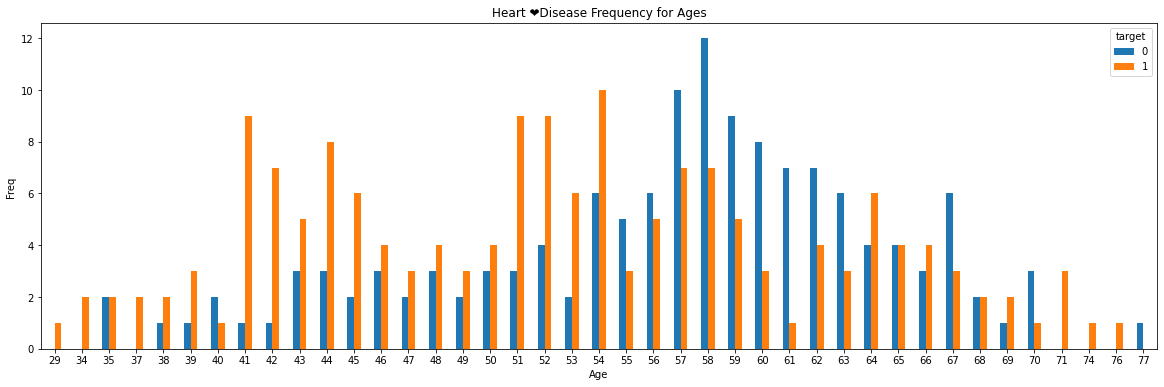

In [29]:
# crosstab ❎ used to compute a simple cross-tabulation of two (or more) factors
pd.crosstab(data.age,data.target).plot(kind='bar',figsize=(20,6))
plt.xlabel('Age')
plt.ylabel('Freq ')
plt.xticks(rotation=0)
plt.title('Heart ❤️Disease Frequency for Ages')
plt.show()